[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Gradient Boosting

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 11/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0055EnsembleGradientBoosting.ipynb)

In [6]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.ensemble import GradientBoostingRegressor

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [7]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [8]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [9]:
# Courses Packages


In [10]:
# General Auxiliary Functions
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotRegressionData


## Gradient Boosting Regression

In this note book we'll use the _Gradient Boosting_ based regressor in the task of estimating a function model based on measurements.  
The gradient boosting is a sequence of estimators which are built in synergy to compensate of the weaknesses of the previous models.

* <font color='brown'>(**#**)</font> In this notebook we use SciKit's Learn [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).  
  In practice it is better to use more optimized implementations:
  - [XGBoost](https://github.com/dmlc/xgboost).
  - [LightGBM](https://github.com/microsoft/LightGBM).
  - [CatBoost](https://github.com/catboost/catboost).  
* <font color='brown'>(**#**)</font> All implementations above offer a SciKit Learn compatible API.
* <font color='brown'>(**#**)</font> SciKit Learn has LightGBM style implementation in the form of [`HistGradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) which is faster and more suitable for large data set.
* <font color='brown'>(**#**)</font> In this case we usually after higher bias and lower variance. Namely each model should be lean.
* <font color='brown'>(**#**)</font> The Gradient Boosting approach is currently considered the _go to_ approach when working on tabular data.

In [11]:
# Parameters

# Data
numSamples  = 150
noiseStd    = 0.1

# Model
numEstimators = 200
learningRate  = 0.1

# Feature Permutation
numRepeats = 50


## Generate / Load Data

In the following we'll generate data according to the following model:

$$ y_{i} = f \left( x_{i} \right) + \epsilon_{i} $$

Where

$$ f \left( x \right) = \sin \left( 20 x \right) + \sin \left( 10 {x}^{1.1} \right) + \frac{x}{10} $$


In [12]:
# Data Generation Function

def f( vX: np.ndarray ) -> np.ndarray:
    return np.sin(20 * vX) * np.sin(10 * (vX ** 1.1)) + (0.1 * vX)

In [13]:
# Generating Data

vX = np.sort(np.random.rand(numSamples))
vY = f(vX) + (noiseStd * np.random.randn(numSamples))

print(f'The features data shape: {vX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (150,)
The labels data shape: (150,)


### Plot Data

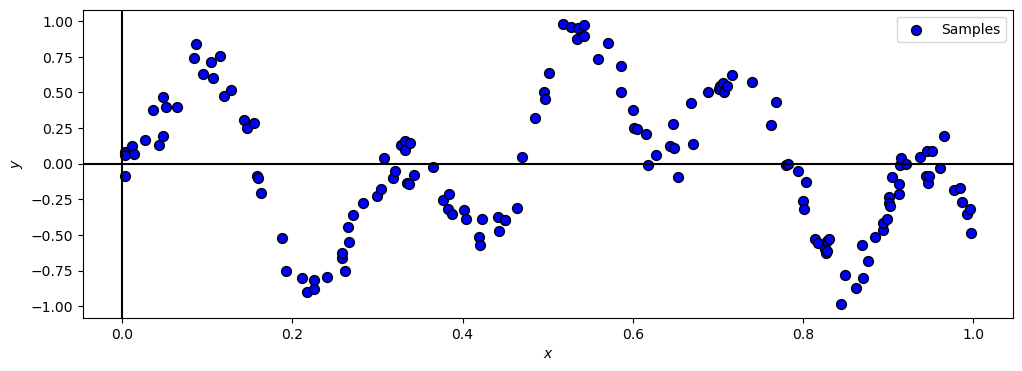

In [14]:
# Plot the Data

hF, hA = plt.subplots(figsize = (12, 4))
hA = PlotRegressionData(vX, vY, hA = hA)
hA.set_xlabel('$x$')
hA.set_ylabel('$y$')

plt.show()

* <font color='red'>(**?**)</font> What model will the ensemble of decision trees apply on the data?

## Train a Gradient Boosting Model

In this section we'll trina a gradient boosting model and recreate its prediction process manually.

The _Gradient Boosting_ model accumulates estimators sequentially by:

$$ {\color{orange} {H}_{M} \left( \boldsymbol{x} \right)} = \sum_{m=1}^{M}{\color{magenta}\alpha} {\color{orange} {h}_{m} \left( \boldsymbol{x} \right)} $$

Where ${h}_{m}$ is optimized to minimize the loss function of the ${\color{orange} {H}_{m} \left( \boldsymbol{x} \right)} = {\color{orange} {H}_{m - 1} \left( \boldsymbol{x} \right)} + \alpha {h}_{m}$ model with respect to ${h}_{m}$.

In [15]:
# Constructing and Training the Model
oGradBoostReg = GradientBoostingRegressor(n_estimators = numEstimators, learning_rate = learningRate)
oGradBoostReg = oGradBoostReg.fit(np.reshape(vX, (-1, 1)), vY)

In [16]:
# Plot the Model by Number of Estimators

def PlotGradientBoosting(numEst: int, learningRate: float, hF: Callable, oGradBoostReg: GradientBoostingRegressor, vX: np.ndarray, vY: np.ndarray, vG: np.ndarray):
    vYPredX = 0 * vX
    vYPredG = 0 * vG
    #<! Building the ensemble of trees
    for ii in range(numEst):
        vYPredG += learningRate * oGradBoostReg.estimators_[ii, 0].predict(np.reshape(vG, (-1, 1))) #<! The `estimators_` is 2D array (Single Column Matrix)
        vYPredX += learningRate * oGradBoostReg.estimators_[ii, 0].predict(np.reshape(vX, (-1, 1)))

    _, hA = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
    hA[0].plot(vG, hF(vG), 'b', label = '$f(x)$')
    hA[0].plot(vG, vYPredG, 'g', label = '$\hat{f}(x)$')
    hA[0].plot(vX, vY, '.r', label = '$y_i$')
    hA[0].set_title (f'Gradient Boosting: {numEst} Trees')
    hA[0].set_xlabel('$x$')
    hA[0].grid(True)
    hA[0].legend()
    
    hA[1].plot(vX, vY, '.r', label = '$y_i$')
    hA[1].stem(vX, vY - vYPredX, '.m', label = '$\hat{r}_i$', markerfmt = '.m')
    hA[1].axhline(y = 0, color = 'k')
    hA[1].set_title (f'Gradient Boosting: Residuals')
    hA[1].set_xlabel('$x$')
    hA[1].grid(True)   
    hA[1].legend()
    
    plt.show()

In [17]:
# Plotting Wrapper
vG = np.linspace(0, 1, 1000)
hPlotGradientBoosting = lambda numEst: PlotGradientBoosting(numEst, learningRate, f, oGradBoostReg, vX, vY, vG)

In [18]:
# Interactive Plot
numEstSlider = IntSlider(min = 1, max = oGradBoostReg.n_estimators_, step = 1, value = 1, layout = Layout(width = '30%'))
interact(hPlotGradientBoosting, numEst = numEstSlider)

plt.show()

interactive(children=(IntSlider(value=1, description='numEst', layout=Layout(width='30%'), max=200, min=1), Ou…